# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### The goal
* Predict the price of a used car, based on past used car sales, by identifying factors that affect the price of used cars to help a used car dealership optimize inventory.

* A dataset of 426K sold used cars from kaggle will be used for this purpose. Based on this dataset this excercise will identify and train appropriate model to predict sale price for used cars, there by helping used car dealers optimize their inventory to maximize their profits.

Goal of this excercise is to understand and identify the parameters that influence the selling price of used cars using a model that will help dealers make business decisions regarding how to stock their inventory of used cars.

Following assumtions were made :
* Only the data set provided will be used for training and validation
* Provided dataset contains data for successfull sales.
* Records where sale price is not listed can be ignored.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [402]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('future.no_silent_downcasting', True)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer#, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline#, make_pipeline
#from statsmodels.tools.tools import add_constant
#from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [338]:
# Load data from the csv file
df = pd.read_csv('./data/vehicles.csv')
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
127388,7308149771,valdosta,36990,2018.00,jeep,wrangler unlimited all new,good,6 cylinders,gas,21534.00,clean,other,1C4HJXDG2JW103337,4wd,NaN,SUV,white,ga
346749,7316838326,greenville / upstate,1995,2001.00,nissan,altima,NaN,NaN,gas,165000.00,salvage,automatic,NaN,fwd,NaN,NaN,NaN,sc
30317,7316277493,inland empire,8995,2008.00,ford,f-150,NaN,NaN,gas,165164.00,clean,automatic,1FTPW12548FA39999,rwd,full-size,pickup,green,ca
359267,7315333748,nashville,19500,2007.00,NaN,hino 268a 24' box truck,fair,6 cylinders,diesel,275000.00,clean,manual,NaN,rwd,full-size,truck,white,tn
44638,7312460932,palm springs,8900,2007.00,mini,cooper convertible s,excellent,4 cylinders,gas,46000.00,clean,automatic,WMWRH335X7TL94458,NaN,NaN,convertible,NaN,ca


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [340]:
df.describe().round(2)

,id,price,year,odometer
count,426880.00,426880.00,425675.00,422480.00
mean,7311486634.22,75199.03,2011.24,98043.33
std,4473170.41,12182282.17,9.45,213881.50
min,7207408119.00,0.00,1900.00,0.00
25%,7308143339.25,5900.00,2008.00,37704.00
50%,7312620821.00,13950.00,2013.00,85548.00
75%,7315253543.50,26485.75,2017.00,133542.50
max,7317101084.00,3736928711.00,2022.00,10000000.00


In [341]:
# shape of the dataframe before we apply any data cleaning steps.
shape_pre_cleaning = df.shape
shape_pre_cleaning

(426880, 18)

In [342]:
# Find out how many records are null for each column.
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [343]:
# info on null column percentages.
for column in df.columns:
    if df[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(df[column].isnull().sum() /
                                               df[column].shape[0]))

year : 0.28%
manufacturer : 4.13%
model : 1.24%
condition : 40.79%
cylinders : 41.62%
fuel : 0.71%
odometer : 1.03%
title_status : 1.93%
transmission : 0.60%
VIN : 37.73%
drive : 30.59%
size : 71.77%
type : 21.75%
paint_color : 30.50%


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

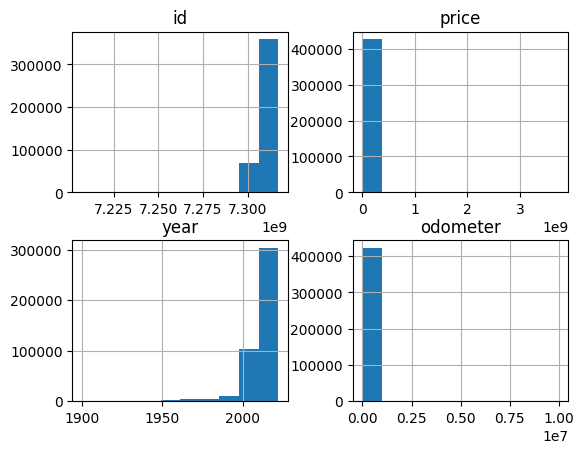

In [344]:
# Now lets take a look at how the data is distributed using Histograms for the numeric columns.
df.hist()

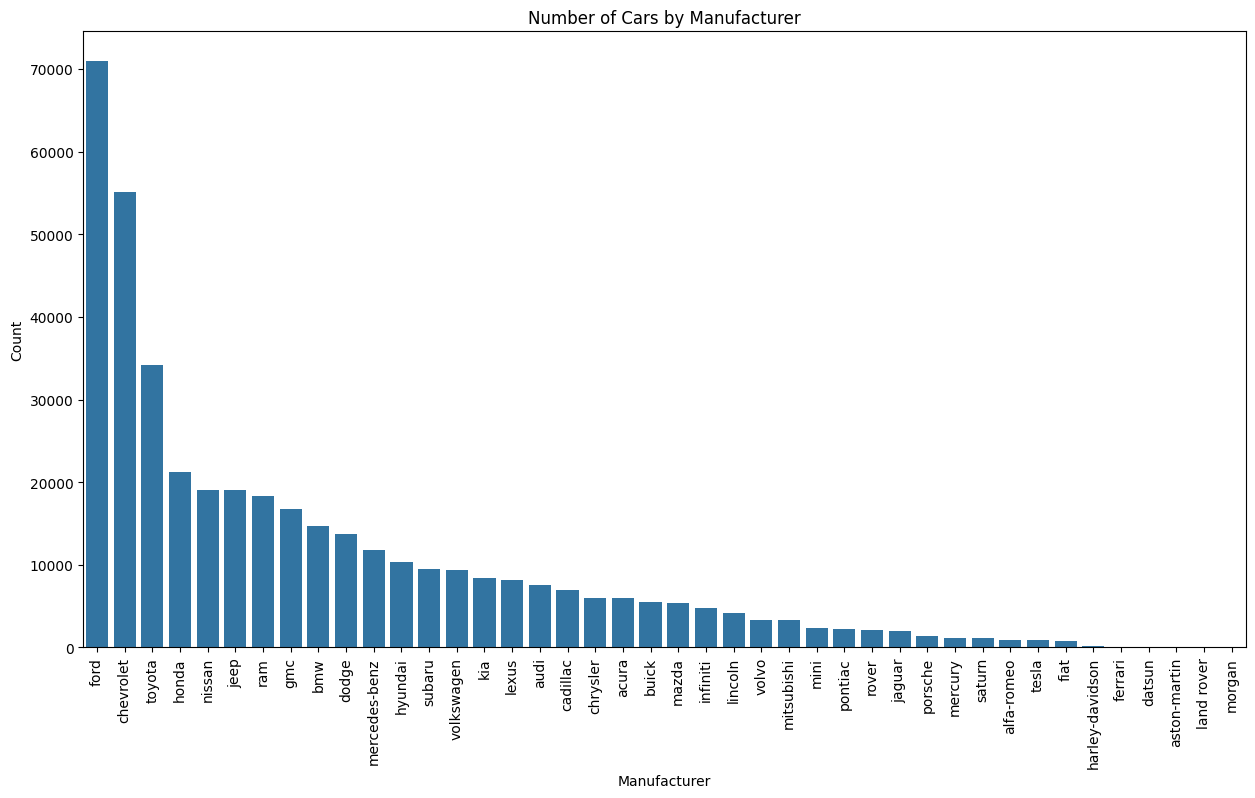

In [345]:
count_data = df.groupby('manufacturer')['id'].count().reset_index().sort_values(by = 'id', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(data = count_data, y= 'id', x = 'manufacturer')
plt.title('Number of Cars by Manufacturer')
plt.ylabel('Count')
plt.xlabel('Manufacturer')
plt.xticks(rotation = 90)
plt.savefig('images/cars_manu.png')
plt.show()

In [346]:
# Now lets look at correlation between numeric columns
df.corr(numeric_only=True)

,id,price,year,odometer
id,1.00,-0.00,-0.06,0.01
price,-0.00,1.00,-0.00,0.01
year,-0.06,-0.00,1.00,-0.16
odometer,0.01,0.01,-0.16,1.00


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Now we look at the data and identify missing data and not necessary data and drop it.

In [347]:
# Drop columns that are not necessary as they will not influence the price.
df = df.drop(columns = ['id', 'title_status', 'model', 'VIN','size', 'region', 'state'], axis = 1)
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.00,nissan,good,6 cylinders,gas,32226.00,other,fwd,sedan,NaN
426876,30590,2020.00,volvo,good,NaN,gas,12029.00,other,fwd,sedan,red
426877,34990,2020.00,cadillac,good,NaN,diesel,4174.00,other,NaN,hatchback,white
426878,28990,2018.00,lexus,good,6 cylinders,gas,30112.00,other,fwd,sedan,silver


In [348]:
df[['price']].describe()

,price
count,426880.00
mean,75199.03
std,12182282.17
min,0.00
25%,5900.00
50%,13950.00
75%,26485.75
max,3736928711.00


In [349]:
# Since the max price is too high , it seems to be an outlier. We can filter records between 10% - 99.99 %.
price_low = df["price"].quantile(0.10)
price_high = df["price"].quantile(0.9999)
print(price_low)
print(price_high)
df = df[(df["price"] < price_high) & (df["price"] > price_low)]
df[['price']].describe()

500.0
1234567.0


,price
count,383717.00
mean,19446.19
std,16677.06
min,501.00
25%,7900.00
50%,15975.00
75%,27990.00
max,1111111.00


In [350]:
# Drop records where price is <= 0
df_filtered = df[df['price'] > 0]
df_filtered

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.00,nissan,good,6 cylinders,gas,32226.00,other,fwd,sedan,NaN
426876,30590,2020.00,volvo,good,NaN,gas,12029.00,other,fwd,sedan,red
426877,34990,2020.00,cadillac,good,NaN,diesel,4174.00,other,NaN,hatchback,white
426878,28990,2018.00,lexus,good,6 cylinders,gas,30112.00,other,fwd,sedan,silver


In [351]:
df[['odometer']].describe()

,odometer
count,381596.00
mean,98387.44
std,189238.87
min,0.00
25%,38123.00
50%,87643.50
75%,136000.00
max,10000000.00


In [352]:
# Since the max price is too high , it seems to be an outlier. We can filter records between 10% - 99.99 %.
odo_low = df["odometer"].quantile(0.10)
odo_high = df["odometer"].quantile(0.9999)
print(odo_low)
print(odo_high)
df = df[(df["odometer"] < odo_high) & (df["odometer"] > odo_low)]
df[['odometer']].describe()

15263.5
9999999.0


,odometer
count,343346.00
mean,105971.31
std,114493.57
min,15264.00
25%,52115.00
50%,97000.00
75%,141877.00
max,9876543.00


In [353]:
# Since number of cylinders can have an influence on the price, we need to impute the missing records, and also convert the numbers of cylinders to int.
df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

In [354]:
cyl_map = {
    "8 cylinders": 8,
    "6 cylinders": 6,
    "4 cylinders": 4,
    "5 cylinders": 5,
    "other": np.nan,  # Convert 'other' to NaN
    "3 cylinders": 3,
    "10 cylinders": 10,
    "12 cylinders": 12
}

df['cylinders'] = df['cylinders'].replace(cyl_map)
df["cylinders"] = pd.to_numeric(df["cylinders"])

In [355]:
# Impute the null values for Cylinder column to mean value as mean and median seems to be same.
mean_cylinder = df['cylinders'].mean().round(1)
median_cylinder = df['cylinders'].median()
print(f"Cylinder mean: {mean_cylinder}")
print(f"Cylinder median: {median_cylinder}")


Cylinder mean: 5.9
Cylinder median: 6.0


In [356]:
df['cylinders'] = df['cylinders'].fillna(mean_cylinder)
df['cylinders'] = df['cylinders'].astype(int)
print(df['cylinders'].value_counts())

cylinders
5     136595
6      79615
4      66220
8      59226
10      1110
3        417
12       163
Name: count, dtype: int64


In [357]:
# Since there are many records with Odometer null, we now impute it with the median since odometer value is right skewed.
mean_om = df['odometer'].mean().round(1)
median_om = df['odometer'].median()
print(f"Odometer mean: {mean_om}")
print(f"Odometer median: {median_om}")


Odometer mean: 105971.3
Odometer median: 97000.0


In [358]:
# We will use median to impute odometer.
df['odometer'] = df['odometer'].fillna(median_om)

In [359]:
# impute year using the mean as it is left skewed 
mean_year = df['year'].mean().round(1)
median_year = df['year'].median()
print(f"Year mean {mean_year}")
print(f"Year median {median_year}")
df['year'] = df['year'].fillna(mean_year)
df['year'] = df['year'].astype(int)

Year mean 2010.7
Year median 2013.0


In [360]:
# for imputing categorical columns, we find the values with most records and use that to fill the null values for that column.
# impute categorical caolumns 

df['manufacturer'].fillna(df['manufacturer'].value_counts().idxmax(), inplace=True)
df['fuel'].fillna(df['fuel'].value_counts().idxmax(), inplace=True)
df['transmission'].fillna(df['transmission'].value_counts().idxmax(), inplace=True)
df['condition'].fillna(df['condition'].value_counts().idxmax(), inplace=True)
df['drive'].fillna(df['drive'].value_counts().idxmax(), inplace=True)
df['type'].fillna(df['type'].value_counts().idxmax(), inplace=True)
df['paint_color'].fillna(df['paint_color'].value_counts().idxmax(), inplace=True)

In [361]:
df.duplicated().sum()
df.drop_duplicates(keep='first', inplace=True)

In [362]:
df.duplicated().sum()

np.int64(0)

##### Now that we have cleaned up most of the data, Lets perform some analysis on the data before we start modeling.

<Axes: title={'center': 'Boxplot of Price'}>

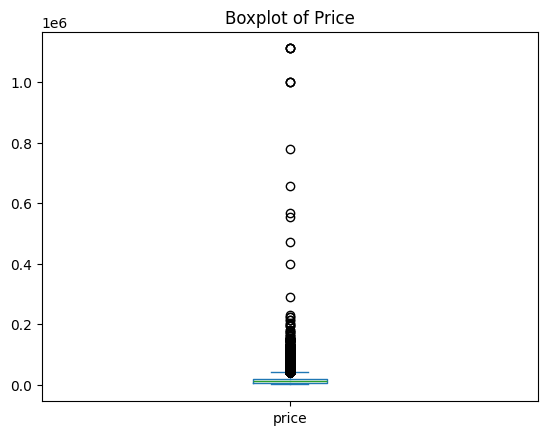

In [363]:
df[['price']].plot( kind= 'box', title = "Boxplot of Price")

<Axes: title={'center': 'Boxplot of odometer'}>

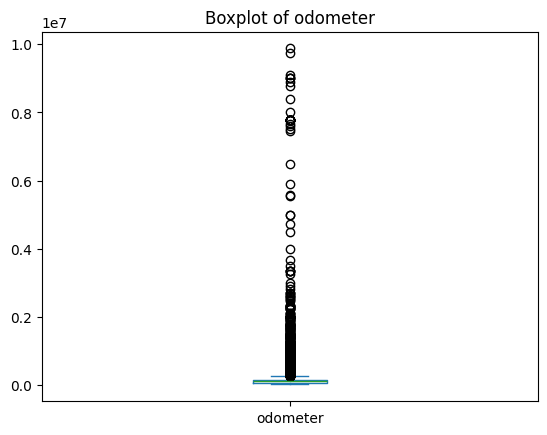

In [364]:
df[['odometer']].plot( kind= 'box', title = "Boxplot of odometer")

We see that the price and odometer data is skewed, so lets add a logarithimic value of the price and odometer columns as a new columns in the dataframe.

In [365]:
df["priceLog"] = np.log(df['price'])
df["odometerLog"] = np.log(df['odometer'])

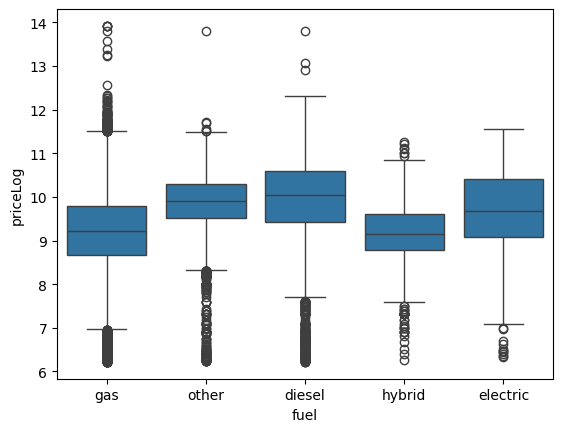

In [366]:
sns.boxplot(y="priceLog",x = 'fuel', data=df)
plt.savefig('images/box_fuel_type.png')
plt.show()

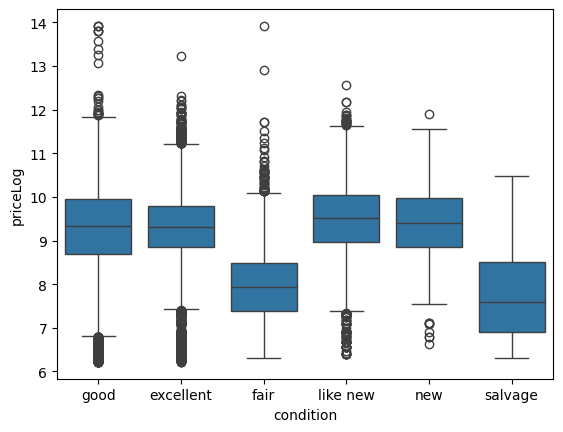

In [367]:
sns.boxplot(y="priceLog",x = 'condition', data=df)
plt.savefig('images/box_condition.png')
plt.show()

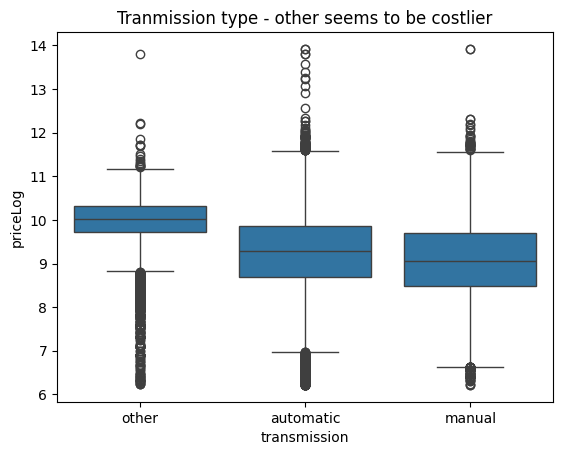

In [368]:
sns.boxplot(y="priceLog",x = 'transmission', data=df)
plt.title("Tranmission type - other seems to be costlier")
plt.savefig('images/box_transmission_type.png')
plt.show()

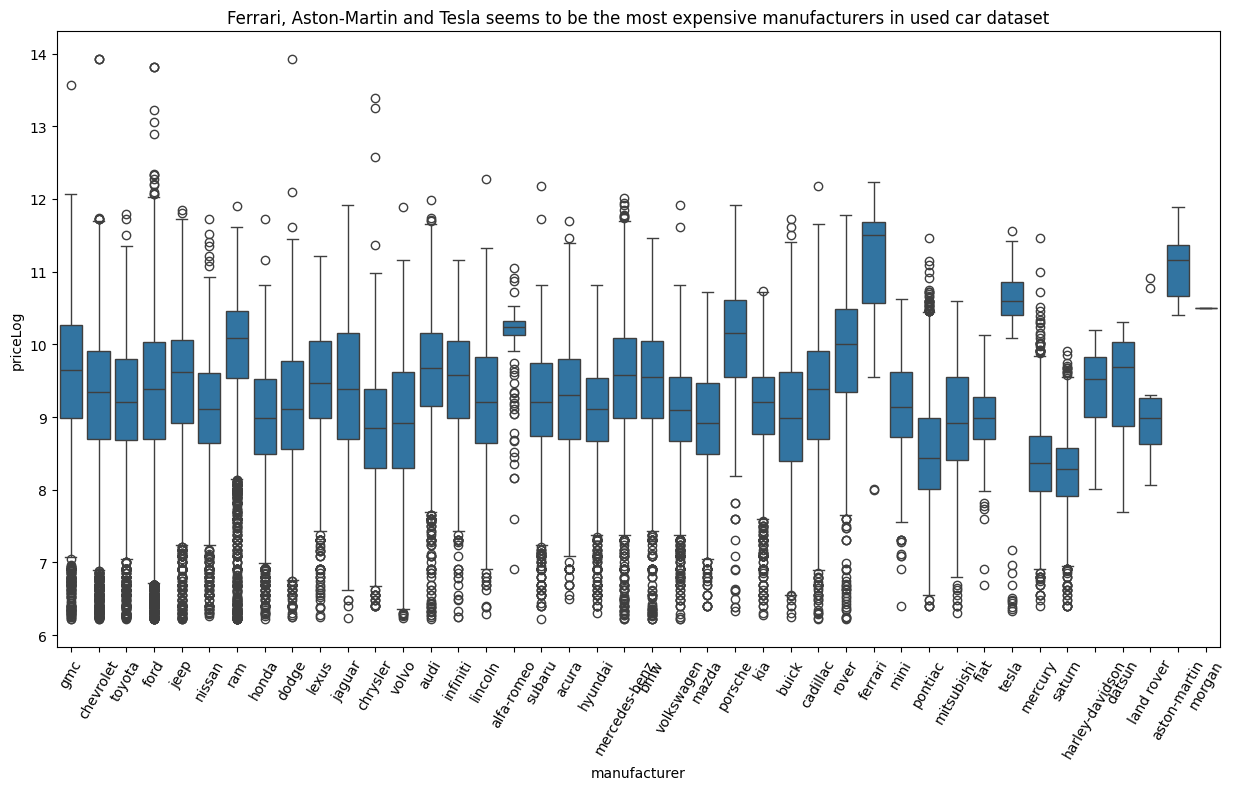

In [369]:
plt.figure(figsize = (15,8))
sns.boxplot(y="priceLog",x = 'manufacturer', data=df)
plt.xticks(rotation=60);
# a lot of variety for different manufactuer types
plt.title("Ferrari, Aston-Martin and Tesla seems to be the most expensive manufacturers in used car dataset")
plt.savefig('images/box_manufactureres.png')
plt.show()

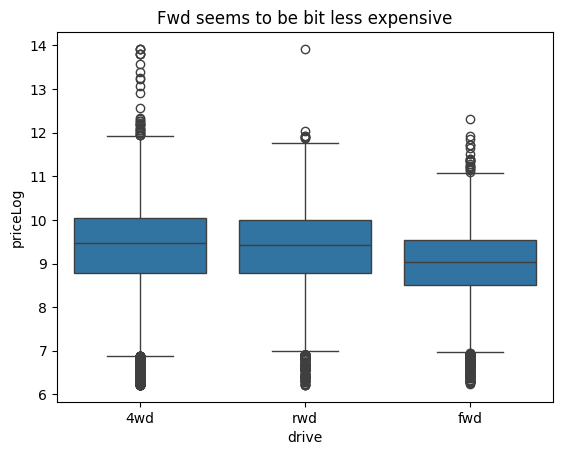

In [370]:
sns.boxplot(y="priceLog",x = 'drive', data=df)
plt.title("Fwd seems to be bit less expensive")
plt.savefig('images/box_drive_type.png')
plt.show()

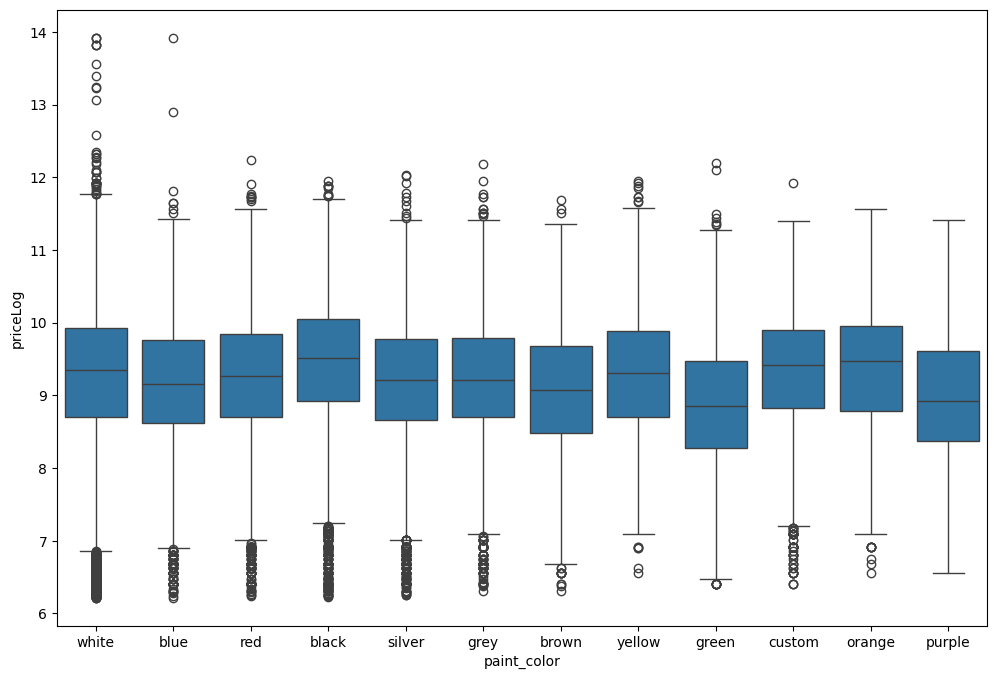

In [371]:
plt.figure(figsize = (12,8))
sns.boxplot(y="priceLog",x = 'paint_color', data=df)
plt.savefig('images/box_paint.png')
plt.show()

<Axes: xlabel='fuel', ylabel='odometerLog'>

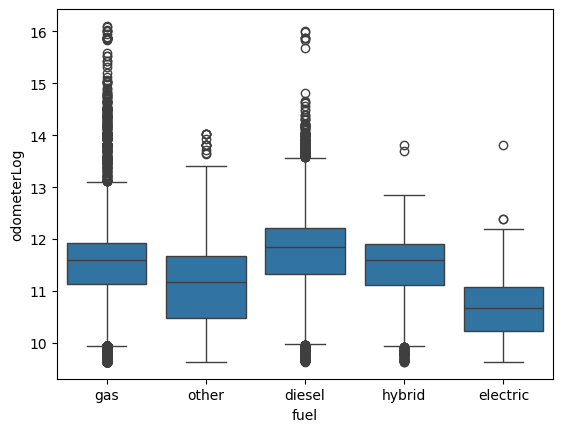

In [372]:
sns.boxplot(y="odometerLog",x = 'fuel', data=df)

<Axes: xlabel='condition', ylabel='odometerLog'>

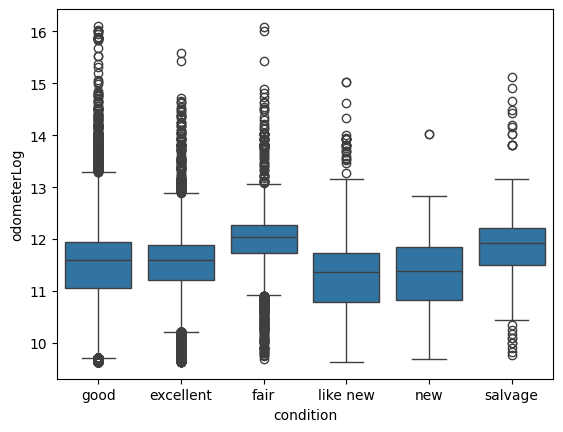

In [373]:
sns.boxplot(y="odometerLog",x = 'condition', data=df)

##### Now we convert the categorical columns in to numerical values. Since there are multiple categorical columns of interest that might influence the price and have many unique values, we can use TargetEncoder instead of OnHot Encoder.

In [374]:
df.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
priceLog        0
odometerLog     0
dtype: int64

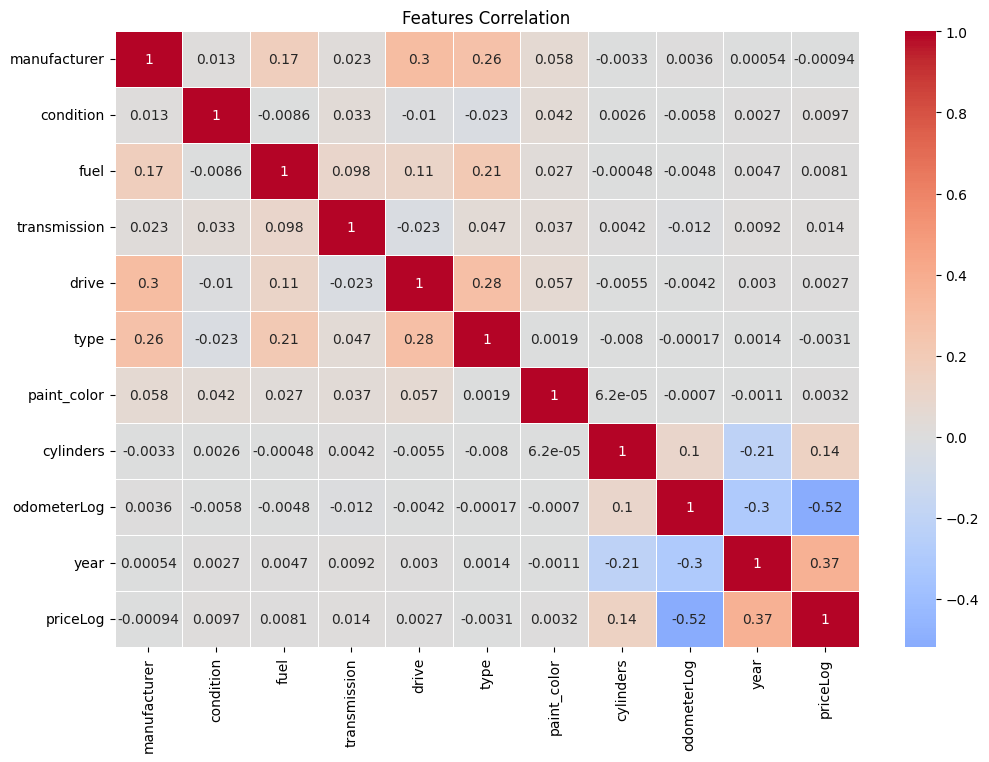

In [375]:
categories = ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
#categories = ['fuel']
encoder = TargetEncoder()
df_modified = df.drop(columns = ['price', 'odometer'], axis = 1)

df_encoded = pd.DataFrame(encoder.fit_transform(df_modified[categories] , df_modified['priceLog']), columns=categories)
# Now combine the encoded DataFrame and the subset of the original (pre-processed) DataFrame with only numerical columna.
corr_data = pd.concat([df_encoded, df[['cylinders','odometerLog', 'year', 'priceLog']]], axis = 1).corr()
# Obtain the correlation matrix and plot it using Heatmap.
#corr_data = data.corr()

ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_data, cmap='coolwarm', center = 0, linewidth = .5, annot = True).set(title='Features Correlation');
plt.savefig('images/corr.png')
plt.show()

Before we start modelling the data, we need to remove the target feature from the dataset we will use for training.

In [376]:
X = df.drop(['price','priceLog','odometer'], axis=1) # This  dataframe will be used for training and testing.
y = df['priceLog'] # We are using log of price for a better normal distribution. This Dataframe will be used for calculating error in predictions

In [377]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205231 entries, 27 to 426846
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          205231 non-null  int64  
 1   manufacturer  205231 non-null  object 
 2   condition     205231 non-null  object 
 3   cylinders     205231 non-null  int64  
 4   fuel          205231 non-null  object 
 5   transmission  205231 non-null  object 
 6   drive         205231 non-null  object 
 7   type          205231 non-null  object 
 8   paint_color   205231 non-null  object 
 9   odometerLog   205231 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 25.3+ MB


In [378]:
# We need to split the data into training and testing sets. We use 20% data set for testing purpose.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [379]:
# Categorize features for different types of encoding
nominal_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
cordinal_features = ['condition']
numerical_features = ['odometerLog','year','cylinders']

In [380]:
# Now we create specific transformers for the different cfeature categories.
nominal_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=[['fair', 'good', 'excellent', 'like new', 'new', 'salvage']])
standard_transformer = StandardScaler()

In [381]:
pre_processor = ColumnTransformer(
    transformers=[
        ('nominal', nominal_transformer, nominal_features),
        ('ordinal', ordinal_transformer, cordinal_features),
        ('numeric', standard_transformer, numerical_features)
    ])

#### Now we create the model pipelines each using different model options, but using the same pre-processing steps.
* First model is Linear Regression

In [382]:
linreg_pipeline = Pipeline([
                            ('preprocessor', pre_processor),
                            ('model', LinearRegression())
                           ])

In [383]:
# Now fit the pipeline with training data
linreg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nominal', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


* Second model is Linear Regression

In [384]:
# Next model is to capture non-linear behavior  of the features
# but we need to find out the optimal degree for the plynomial model.
def get_MSE_for_k_degree(k):
    model = Pipeline([
        ('preprocessor', pre_processor),
        ('poly_transform', PolynomialFeatures(degree = k)),
        ('linreg', LinearRegression(fit_intercept = True))
    ])
    model.fit(X_train, y_train)
    return mean_squared_error(model.predict(X_test),y_test)

In [385]:
ks = np.array(range(0, 3))
MSEs = [get_MSE_for_k_degree(k) for k in ks]
MSEs_and_k = pd.DataFrame({"k": ks, "MSE" : MSEs})
MSEs_and_k

,k,MSE
0,0,0.82
1,1,0.37
2,2,0.27


In [386]:
print(get_MSE_for_k_degree(3))


0.26086065917013157


Based onthe above MSE results, it seems that k=2 is the best degree for the ploynomial feature model.

In [387]:
ploy_pipeline = Pipeline([
        ('preprocessor', pre_processor),
        ('poly_transform', PolynomialFeatures(degree = 2)),
        ('linreg', LinearRegression(fit_intercept = True))
    ])
#ploy_pipeline.fit(X_train, y_train)

* Third model - we will apply regularization to control complexity and avoid overfitting. We will try with L1 and L2 regularization and find the best alpha value using GridSearchCV by comparing both regularization techniques and various values of alpha.
  

* First we create a parameter grid that has boththe Ridge and LASSO regrssion models with a respectibe list of alpha values we want to try out. 
    

In [388]:
params_to_try = [
    {'linreg': [Lasso()], 'linreg__alpha': [0.001, 0.01, 0.1, 1, 10]},
    {'linreg': [Ridge()], 'linreg__alpha': [0.001, 0.01, 0.1, 1, 10]}
]

In [389]:
model_finder = GridSearchCV(ploy_pipeline, params_to_try, cv=5, scoring='neg_mean_squared_error', verbose=3)

In [390]:
model_finder.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END linreg=Lasso(), linreg__alpha=0.001;, score=-0.256 total time=   9.5s
[CV 2/5] END linreg=Lasso(), linreg__alpha=0.001;, score=-0.299 total time=   7.4s
[CV 3/5] END linreg=Lasso(), linreg__alpha=0.001;, score=-0.251 total time=   6.5s
[CV 4/5] END linreg=Lasso(), linreg__alpha=0.001;, score=-0.368 total time=   7.9s
[CV 5/5] END linreg=Lasso(), linreg__alpha=0.001;, score=-0.271 total time=   8.4s
[CV 1/5] END linreg=Lasso(), linreg__alpha=0.01;, score=-0.300 total time=   1.5s
[CV 2/5] END linreg=Lasso(), linreg__alpha=0.01;, score=-0.340 total time=   1.5s
[CV 3/5] END linreg=Lasso(), linreg__alpha=0.01;, score=-0.289 total time=   1.6s
[CV 4/5] END linreg=Lasso(), linreg__alpha=0.01;, score=-0.408 total time=   1.5s
[CV 5/5] END linreg=Lasso(), linreg__alpha=0.01;, score=-0.314 total time=   1.5s
[CV 1/5] END linreg=Lasso(), linreg__alpha=0.1;, score=-0.416 total time=   1.2s
[CV 2/5] END linreg=Lasso(), linr

,estimator,Pipeline(step...egression())])
,param_grid,"[{'linreg': [Lasso()], 'linreg__alpha': [0.001, 0.01, ...]}, {'linreg': [Ridge()], 'linreg__alpha': [0.001, 0.01, ...]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('nominal', ...), ('ordinal', ...), ...]"


In [391]:
optimal_model = model_finder.best_estimator_
optimal_params = model_finder.best_params_
optimal_score = model_finder.best_score_
print(optimal_model)
print(optimal_params)
print(optimal_score)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new',
         

Now that we have the following models examined, we predict the results i.e. price using them and then compare the results
* Simple LinearRegression
* Pipeline with ploynomial features of degree 2 and using Linear regression
* Pipeline with polynomial features using Ridge Regresion model with alpha = 10.
    


In [394]:
linreg_pipeline = Pipeline([
                            ('preprocessor', pre_processor),
                            ('model', LinearRegression())
                           ])
ploy_pipeline = Pipeline([
        ('preprocessor', pre_processor),
        ('poly_transform', PolynomialFeatures(degree = 2)),
        ('linreg', LinearRegression(fit_intercept = True))
    ])
ridge_pipeline = Pipeline([
        ('preprocessor', pre_processor),
        ('poly_transform', PolynomialFeatures(degree = 2)),
        ('linreg', Ridge(alpha = 10))
    ])



In [395]:
linreg_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nominal', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [396]:
ploy_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('poly_transform', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nominal', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [397]:
ridge_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('poly_transform', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nominal', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Now that we have fit all the three models we use them to predict the price.
    

In [398]:
linreg_predict = linreg_pipeline.predict(X_test)
ploy_predict = ploy_pipeline.predict(X_test)
ridge_predict = ridge_pipeline.predict(X_test)
result_df = pd.DataFrame({
            'linreg': linreg_predict,
            'ployreg': ploy_predict,
            'ridgereg' : ridge_predict,
            'actual' : y_test,
            'year': X_test['year']
})
result_df


,linreg,ployreg,ridgereg,actual,year
293775,9.46,9.77,9.77,9.61,2013
73585,10.84,11.07,11.06,10.97,2018
238169,9.37,9.46,9.45,9.69,2007
350685,8.74,8.61,8.61,8.48,2007
191148,9.46,9.32,9.32,8.52,2002
...,...,...,...,...,...
111639,8.64,8.48,8.48,8.13,1998
213260,8.83,8.60,8.60,8.29,2004
60808,8.92,8.89,8.89,8.96,2005
163699,9.24,9.49,9.49,9.68,2012


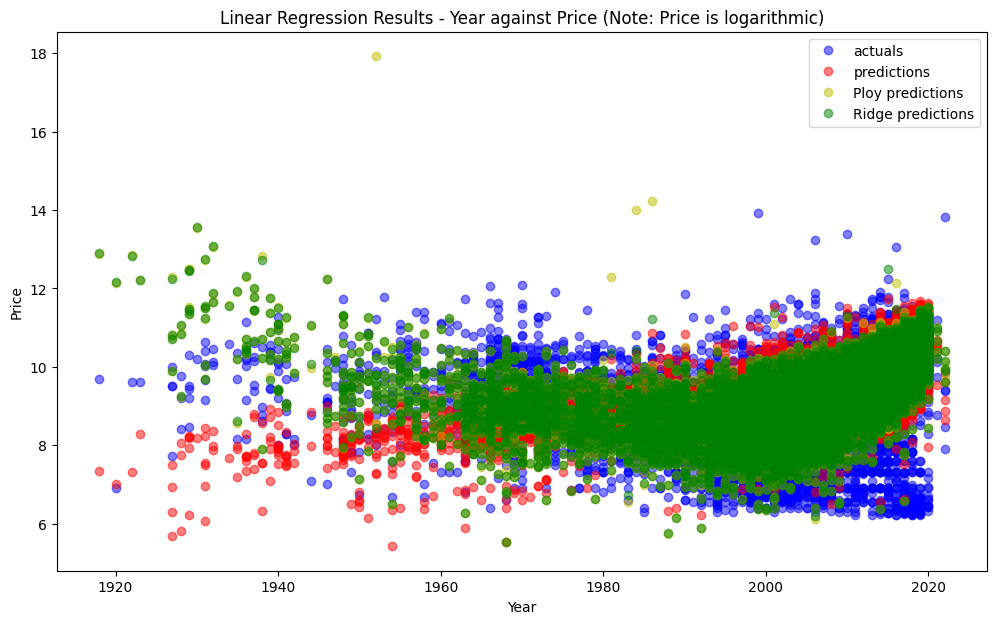

In [399]:
#result_df.plot(kind = 'scatter', x='year', y= ['linreg',	'ployreg', 'ridgereg',	'actual'])
fig, axes = plt.subplots(1, 1, figsize =(12, 7))
axes.plot (X_test.year, y_test, 'ob', label ='actuals', alpha=0.5)
axes.plot (X_test.year, linreg_predict, 'or', label ='predictions', alpha=0.5)
axes.plot (X_test.year, ploy_predict, 'oy', label ='Ploy predictions', alpha=0.5)
axes.plot (X_test.year, ridge_predict, 'og', label ='Ridge predictions', alpha=0.5)
axes.set(xlabel='Year', ylabel='Price')
axes.legend()
axes.set_title('Linear Regression Results - Year against Price (Note: Price is logarithmic)')
plt.savefig('images/scatter_pred_comp.png')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [330]:
linreg_mse = mean_squared_error(linreg_predict, y_test)
ploy_mse = mean_squared_error(ploy_predict, y_test)
ridge_mse = mean_squared_error(ridge_predict, y_test)

print("LinearRegression MSE is - ", linreg_mse)
print("Polynomial Regression MSE is - ", ploy_mse)
print("RidgeRegression MSE is - ", ridge_mse)


LinearRegression MSE is -  0.368943168150751
Polynomial Regression MSE is -  0.26594650063268765
RidgeRegression MSE is -  0.26244454873655465


In [403]:

linreg_rmse = root_mean_squared_error(linreg_predict, y_test)
ploy_rmse = root_mean_squared_error(ploy_predict, y_test)
ridge_rmse = root_mean_squared_error(ridge_predict, y_test)

print("LinearRegression RMSE is - ", linreg_rmse)
print("Polynomial Regression RMSE is - ", ploy_rmse)
print("RidgeRegression RMSE is - ", ridge_rmse)

LinearRegression RMSE is -  0.6074069213885787
Polynomial Regression RMSE is -  0.5157000103089854
RidgeRegression RMSE is -  0.5122934205477898


Based on the above MSEs we can conclude that Ridge regression with alpha = 10 is the best model and gives lease MSE on the test data set.

Now that we have identified the best model, lets get the weitages it has assigned to each of the features.

In [336]:
ridge_model = ridge_pipeline.named_steps['linreg']
feature_names = ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefs = ridge_model.coef_
features_coef_df = zip(feature_names,coefs)
sorted_coefs = sorted(features_coef_df, key=lambda x: x[1], reverse=True)
for feature, coef in sorted_coefs:
    print(f'{feature}: {coef}')

numeric__cylinders: 0.37862222410427765
numeric__odometerLog: 0.24138267718165438
nominal__manufacturer_toyota: 0.1812163682156363
nominal__manufacturer_fiat: 0.1650940850704678
nominal__manufacturer_ram: 0.13695379341806016
nominal__transmission_automatic: 0.1038281349907473
nominal__manufacturer_lincoln: 0.10104876114990281
nominal__manufacturer_saturn: 0.09631062225606074
nominal__manufacturer_audi: 0.06900152572897825
nominal__manufacturer_aston-martin: 0.06781249026234022
nominal__type_sedan: 0.06335162191620784
nominal__manufacturer_jeep: 0.06241131139038443
nominal__manufacturer_volkswagen: 0.0591224097132627
nominal__fuel_diesel: 0.05459734223010264
nominal__manufacturer_chevrolet: 0.05190047231418084
nominal__manufacturer_mercury: 0.04368559451088516
nominal__type_coupe: 0.043445818278823184
nominal__type_pickup: 0.042636483579965696
nominal__type_van: 0.037583857402119634
nominal__type_convertible: 0.037154142178341815
nominal__manufacturer_alfa-romeo: 0.036162966803404716
no

Based on the coef values assigned tpo different features, we can identify few key features that influence teh used car price the most. Using this insight we can advice the dealers on whcih car features they shoudl focus on to maximize the sell price.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The goal of this excercise was to identify factors affecting the sell price of used cars to assist user car dealers perform effective inventory management and maximize their profits.

Here are some key finding based on the analysis and modelling excercise perofrmed above.

#### Key Findings

* Age (Model Year)  -  Newer cars sell for higher price.
* Number of cylinders -  Cars with more number of cylinders tend to sell at higher price. Higher number of cylinders is an indication of higher engine power. This infers that drivers are attracted to cars with higher engine power.
* Odometer reading -  Cars with lower odometer reading tend to sell for higher price. 
* Transmission type - It is also observed that drivers prefer certain type of transmissions over others. Especially "Automatic" transmission is preferred by drivers over others the most. 
* Fuel type - Cars that run on Disel fuel are favored the most by drivers followed by electric , gas and hybrid in that order.
* Car type - When it comes to the tupe of a car, "Sedan" is liked the most followed by "Coupe", "pickup" and then "Van" 
* Cars from certain Manufacturer's are favored by drivers. The most favored being "Toyota" followed by "Fiat", "Ram" and "Lincoln"

#### Recommendations

* Focus on newer cars with low mileage. This will attract buyers who are looking for used but relatively new cars.
* To attract drivers who are looking for engine power, focus on bigger cars.
* Buyers who care about fuel expenses, will get attracted to cars that run on Disel, Electric and Hybrid. Focus on cars that run on these fuels types, and are more fuel efficient.
* Focus on "Sedan" type cars more, followed by "Coupe", "Pickups" and "Vans",
* Try to stock up on cars from fast selling Brands such as "Toyota", "Fiat" and "Ram".
* Aditionaly, usng the model developed above, implement a feature based pricing strategy to price the cars at a right point to maximize the chances of sell.
  